# Full Data

Running `test.ipynb` on the full `data/` folder.

NOTE: Running this on my laptop takes about 10 minutes.

## Imports and Constants

In [2]:
import glob
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# 15 points, ranging from 1 minute to 100 days, in a log scale, represented in seconds
TIME_DELTAS = np.geomspace(60, 60*60*24*100, num=15, dtype=int)
REQ_COLS = ['CreatedAt_Full', 'Hashtags']

## Parsing

In [4]:
data_files = glob.glob("../data/cleaned_data/2020-*.csv.gz")
print(data_files)

['../data/cleaned_data/2020-02-04mod.csv.gz', '../data/cleaned_data/2020-03-02mod.csv.gz', '../data/cleaned_data/2020-02-10mod.csv.gz', '../data/cleaned_data/2020-01-26mod.csv.gz', '../data/cleaned_data/2020-03-23mod.csv.gz', '../data/cleaned_data/2020-03-31mod.csv.gz', '../data/cleaned_data/2020-03-25mod.csv.gz', '../data/cleaned_data/2020-02-16mod.csv.gz', '../data/cleaned_data/2020-03-28mod.csv.gz', '../data/cleaned_data/2020-03-09mod.csv.gz', '../data/cleaned_data/2020-03-17mod.csv.gz', '../data/cleaned_data/2020-02-11mod.csv.gz', '../data/cleaned_data/2020-02-05mod.csv.gz', '../data/cleaned_data/2020-03-03mod.csv.gz', '../data/cleaned_data/2020-02-24mod.csv.gz', '../data/cleaned_data/2020-02-22mod.csv.gz', '../data/cleaned_data/2020-01-21mod.csv.gz', '../data/cleaned_data/2020-03-30mod.csv.gz', '../data/cleaned_data/2020-02-17mod.csv.gz', '../data/cleaned_data/2020-02-03mod.csv.gz', '../data/cleaned_data/2020-03-05mod.csv.gz', '../data/cleaned_data/2020-03-08mod.csv.gz', '../data/

In [5]:
dtypes = {'CreatedAt_Full': str, 'Hashtags': str}
parse_dates = ['CreatedAt_Full']
df = pd.concat((pd.read_csv(file, usecols=REQ_COLS, dtype=dtypes, parse_dates=parse_dates).dropna() for file in data_files))
# output size of dataset
print(f'Rows: {df.shape[0]}')
print(f'Rows with null values: {df.isnull().any(axis=1).sum()}')
# drop rows with null values
df.dropna(inplace=True)
df.shape

Rows: 26857300
Rows with null values: 0


(26857300, 2)

In [6]:
# convert date to pandas datetime (is this necessary?)
df['CreatedAt_Full'] = pd.to_datetime(df['CreatedAt_Full'])

# sort by date
df.sort_values(by='CreatedAt_Full', inplace=True)

df.head()

,CreatedAt_Full,Hashtags
8,2020-01-21 22:21:59+00:00,'dyk'
9,2020-01-21 22:21:59+00:00,'flu'
10,2020-01-21 22:25:08+00:00,'coronavirus'
5,2020-01-21 22:25:22+00:00,'coronavirus'
12,2020-01-21 22:27:24+00:00,'coronavirus'


In [7]:
START_DATE = df.iloc[0]['CreatedAt_Full']
START_DATE

Timestamp('2020-01-21 22:21:59+0000', tz='tzutc()')

In [8]:
# this is the "end date"
df.iloc[-1]['CreatedAt_Full']

Timestamp('2020-03-31 23:58:54+0000', tz='tzutc()')

## Analyzing

In [9]:
# for every time delta, get the number of hashtags created between START and that time delta
# return total hashtags as well as distinct hashtags

def get_num_hashtags(input_df, time_delta, start_date):
    end_date = start_date + pd.Timedelta(seconds=time_delta)
    new_df = input_df[(input_df['CreatedAt_Full'] >= start_date) & (input_df['CreatedAt_Full'] < end_date)]
    return new_df.shape[0], len(new_df['Hashtags'].unique())

In [10]:
total_hashtags = []
unique_hashtags = []

for time_delta in TIME_DELTAS:
    total, unique = get_num_hashtags(df, time_delta, START_DATE)
    total_hashtags.append(total)
    unique_hashtags.append(unique)
    print(f'{time_delta} seconds: {total} total hashtags, {unique} unique hashtags')

60 seconds: 2 total hashtags, 2 unique hashtags
140 seconds: 2 total hashtags, 2 unique hashtags
327 seconds: 6 total hashtags, 5 unique hashtags
764 seconds: 9 total hashtags, 8 unique hashtags
1786 seconds: 16 total hashtags, 12 unique hashtags
4172 seconds: 48 total hashtags, 29 unique hashtags
9747 seconds: 79 total hashtags, 39 unique hashtags
22768 seconds: 79 total hashtags, 39 unique hashtags
53184 seconds: 79 total hashtags, 39 unique hashtags
124234 seconds: 13125 total hashtags, 1491 unique hashtags
290198 seconds: 222899 total hashtags, 8602 unique hashtags
677876 seconds: 3238704 total hashtags, 60851 unique hashtags
1583451 seconds: 7258702 total hashtags, 178823 unique hashtags
3698786 seconds: 20823202 total hashtags, 396458 unique hashtags
8640000 seconds: 26857300 total hashtags, 711432 unique hashtags


## Graphing

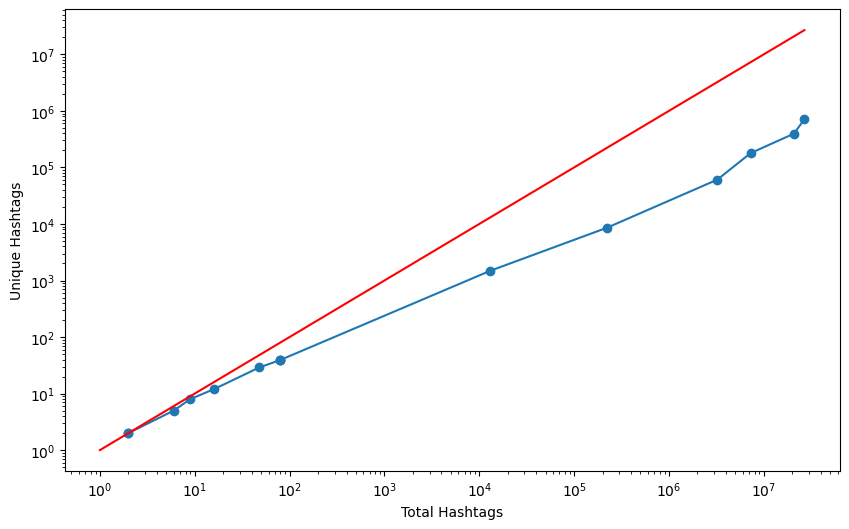

In [14]:
# use matplotlib to graph a connected scatterplot of the number of hashtags vs total hashtags 
# plot total hashtags vs unique hashtags

plt.figure(figsize=(10, 6))
plt.plot(total_hashtags, unique_hashtags, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Hashtags')
plt.ylabel('Unique Hashtags')

# add x=y line
m = max(max(total_hashtags), max(unique_hashtags))
x = np.linspace(1, m, 100)
y = x
plt.plot(x, y, color='red')

# save plot BEFORE showing it (otherwise it will be blank)
plt.savefig('../images/figure3.png', dpi=300, bbox_inches='tight')

plt.show()